In [5]:
# create imports 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from tools import utils, ml_tools, formats
import numpy as np

In [6]:
# ---- NB --------
nb_unpickled_df = utils.load_pickle_file_to_df('NB_trainingsize_plot_2500epochs_y1c1c2_sem')
arr1 = nb_unpickled_df['accuracy'][0]
train_sizes = [0.5,0.6,0.7,0.8,0.9]

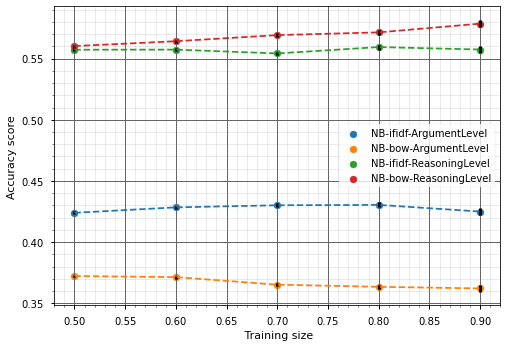

In [29]:
for i in range(4):
    # all of the arrays will be of size 4 for training size graphs anyway
    plt.scatter(train_sizes,nb_unpickled_df['accuracy'][i], label = '{}-{}-{}'.format('NB',nb_unpickled_df['feature extraction'][i],nb_unpickled_df['Label'][i]))
    plt.plot(train_sizes,nb_unpickled_df['accuracy'][i], '--')
    plt.errorbar(train_sizes, nb_unpickled_df['accuracy'][i], yerr = nb_unpickled_df['sem'][i], fmt = 'o', 
                markersize=1, elinewidth=3, color= 'black')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xlabel(' Training size')
plt.ylabel('Accuracy score')
plt.legend()

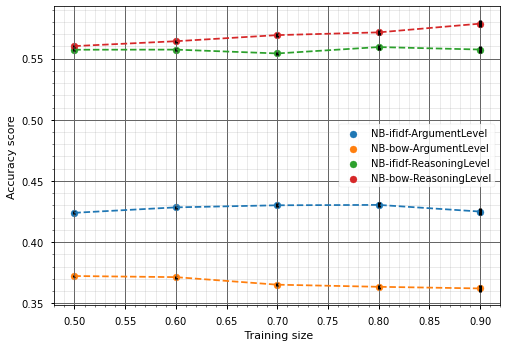

In [23]:
def ml_results_graph(train_size, df, mlmodel):
    for i in range(4):
        # all of the arrays will be of size 4 for training size graphs anyway
        plt.scatter(train_size,df['accuracy'][i], label = '{}-{}-{}'.format(mlmodel,df['feature extraction'][i],df['Label'][i]))
        plt.plot(train_size, df['accuracy'][i], '--')
        plt.errorbar(train_sizes, nb_unpickled_df['accuracy'][i], yerr = nb_unpickled_df['sem'][i], fmt = 'o', markersize=0.5, capsize=5, elinewidth=3, color= 'black')
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel(' Training size')
    plt.ylabel('Accuracy score')
    plt.legend()
    return 

def ml_results_graph_std(train_size, df, mlmodel):
    for i in range(4):
        # all of the arrays will be of size 4 for training size graphs anyway
        plt.scatter(train_size,df['accuracy'][i], label = '{}-{}-{}'.format(mlmodel,df['feature extraction'][i],df['Label'][i]))
        plt.plot(train_size, df['accuracy'][i], '--')
        plt.errorbar(train_sizes, nb_unpickled_df['accuracy'][i], yerr = nb_unpickled_df['standdev'][i], fmt = 'o', 
                markersize=0.5, capsize=5, elinewidth=3, color= 'black')
    plt.grid(b=True, which='major', color='#666666', linestyle='-')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
    plt.xlabel(' Training size')
    plt.ylabel('Accuracy score')
    plt.legend()
    return 
    
nbgraph = ml_results_graph(train_sizes, nb_unpickled_df, 'NB')

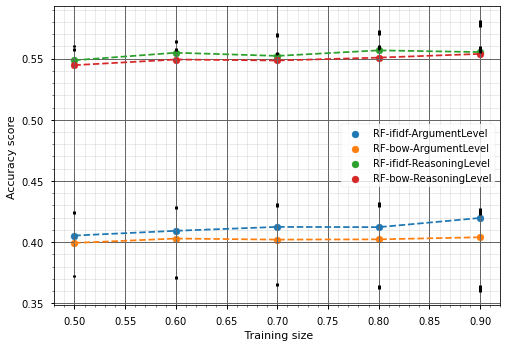

In [31]:
rf_unpickled_df = utils.load_pickle_file_to_df('RF_trainingsize_plot_2500epochs_y1c1c2_sem')
rfgraph = ml_results_graph(train_sizes, rf_unpickled_df, 'RF')

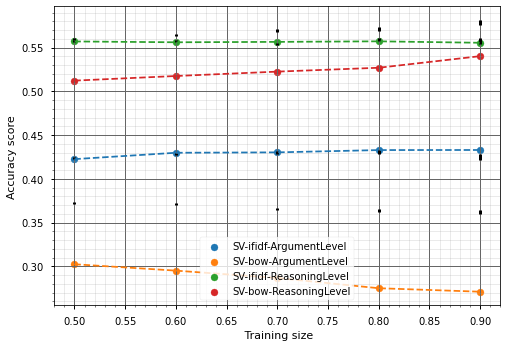

In [25]:
svm_unpickled_df = utils.load_pickle_file_to_df('SVM_trainingsize_plot_2500epochs_y1c1c2_sem')
svmgraph = ml_results_graph(train_sizes, svm_unpickled_df, 'SV')